In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

## Load Dataset

In [2]:
df  = pd.read_csv("D:\\DataSet\\bengaluru_house_prices.csv")

In [3]:
df.head(10)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732,4.0,NaN,204.00
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,NaN,600.00
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,NaN,1310,3.0,1.0,63.25
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,NaN,1020,6.0,NaN,370.00


### EDA

In [4]:
df.shape

(13320, 9)

In [5]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [6]:
df.columns.unique()

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [7]:
df1 = df.drop(['availability','society','balcony'], axis = 1)

In [8]:
df1.tail(10)

,area_type,location,size,total_sqft,bath,price
13310,Super built-up Area,Rachenahalli,2 BHK,1050,2.0,52.71
13311,Plot Area,Ramamurthy Nagar,7 Bedroom,1500,9.0,250.00
13312,Super built-up Area,Bellandur,2 BHK,1262,2.0,47.00
13313,Super built-up Area,Uttarahalli,3 BHK,1345,2.0,57.00
13314,Super built-up Area,Green Glen Layout,3 BHK,1715,3.0,112.00
13315,Built-up Area,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Super built-up Area,Richards Town,4 BHK,3600,5.0,400.00
13317,Built-up Area,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Super built-up Area,Padmanabhanagar,4 BHK,4689,4.0,488.00
13319,Super built-up Area,Doddathoguru,1 BHK,550,1.0,17.00


In [9]:
df1.shape

(13320, 6)

In [10]:
df1.groupby('area_type')['area_type'].value_counts().sort_values(ascending = False)

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64

In [11]:
df1['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [12]:
df1 = df1.drop(['area_type'], axis = 1)

#### Data Cleaning 

In [13]:
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [14]:
df1

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13319 non-null  object 
 1   size        13304 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [16]:
df1['size'].apply(lambda x: int(x.split(' ')[0]) if isinstance(x,str) else None)

0        2.0
1        4.0
2        3.0
3        3.0
4        2.0
        ... 
13315    5.0
13316    4.0
13317    2.0
13318    4.0
13319    1.0
Name: size, Length: 13320, dtype: float64

* if isinstance(x,str) else None 
--> it is required since the data is not clean and may encounter NaN, which will give error if the code snippet is not used.

In [17]:
df1['BHK'] = df1['size'].apply(lambda x: int(x.split(' ')[0]) if isinstance (x, str) else None)

In [18]:
df1

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2.0
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4.0
2,Uttarahalli,3 BHK,1440,2.0,62.00,3.0
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3.0
4,Kothanur,2 BHK,1200,2.0,51.00,2.0
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00,5.0
13316,Richards Town,4 BHK,3600,5.0,400.00,4.0
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2.0
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00,4.0


In [19]:
df1.apply(lambda row: row['bath'] if pd.notnull(row['bath']) else row['BHK'], axis=1)

0        2.0
1        5.0
2        2.0
3        3.0
4        2.0
        ... 
13315    4.0
13316    5.0
13317    2.0
13318    4.0
13319    1.0
Length: 13320, dtype: float64

In [20]:
df1[df1['bath'].isnull()].index

Index([   56,    81,   224,   344,   579,   669,   702,   801,   941,  1264,
        1267,  1686,  1724,  1765,  1775,  1852,  2264,  2500,  2563,  2809,
        2862,  2944,  2998,  3370,  3544,  3598,  3862,  4210,  4346,  4843,
        4894,  4995,  5333,  5464,  5498,  5747,  5918,  6256,  6343,  6423,
        6481,  6636,  6719,  6778,  6873,  6971,  7398,  7623,  7680,  7921,
        8020,  8056,  8275,  8289,  8306,  8472,  8565,  8703,  8783,  9129,
        9437,  9699, 10330, 10553, 10634, 10726, 11019, 11297, 11496, 11569,
       12768, 12861, 13240],
      dtype='int64')

In [21]:
df1[df1['bath'].isnull() == True]

,location,size,total_sqft,bath,price,BHK
56,Devanahalli,4 Bedroom,3010 - 3410,NaN,192.000,4.0
81,Hennur Road,4 Bedroom,2957 - 3450,NaN,224.500,4.0
224,Devanahalli,3 BHK,1520 - 1740,NaN,74.820,3.0
344,Kanakpura Road,1 BHK,525,NaN,21.530,1.0
579,Sarjapur Road,NaN,1200 - 2400,NaN,34.185,NaN
...,...,...,...,...,...,...
11496,Kanakpura Road,1 BHK,525,NaN,27.000,1.0
11569,Hosur Road,NaN,1350,NaN,8.440,NaN
12768,Bettahalsoor,5 Bedroom,3210,NaN,353.000,5.0
12861,KR Puram,4 BHK,2204 - 2362,NaN,121.000,4.0


In [22]:
df1['Bathroom'] = df1.apply(lambda row: row['bath'] if pd.notnull (row['bath']) else row['BHK'], axis = 1)

subtitute the value of BHK to bath where ever bath is null and BHK is not

In [23]:
df1

,location,size,total_sqft,bath,price,BHK,Bathroom
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2.0,2.0
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4.0,5.0
2,Uttarahalli,3 BHK,1440,2.0,62.00,3.0,2.0
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3.0,3.0
4,Kothanur,2 BHK,1200,2.0,51.00,2.0,2.0
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00,5.0,4.0
13316,Richards Town,4 BHK,3600,5.0,400.00,4.0,5.0
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2.0,2.0
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00,4.0,4.0


In [24]:
df2 = df1.drop(['bath','size'], axis = 1)

In [25]:
df2.isnull().sum()

location       1
total_sqft     0
price          0
BHK           16
Bathroom      16
dtype: int64

In [26]:
df3 = df2.dropna()
df3.isnull().sum()

location      0
total_sqft    0
price         0
BHK           0
Bathroom      0
dtype: int64

In [27]:
df3.shape

(13303, 5)

In [28]:
df3.head(20)

,location,total_sqft,price,BHK,Bathroom
0,Electronic City Phase II,1056,39.07,2.0,2.0
1,Chikka Tirupathi,2600,120.00,4.0,5.0
2,Uttarahalli,1440,62.00,3.0,2.0
3,Lingadheeranahalli,1521,95.00,3.0,3.0
4,Kothanur,1200,51.00,2.0,2.0
5,Whitefield,1170,38.00,2.0,2.0
6,Old Airport Road,2732,204.00,4.0,4.0
7,Rajaji Nagar,3300,600.00,4.0,4.0
8,Marathahalli,1310,63.25,3.0,3.0
9,Gandhi Bazar,1020,370.00,6.0,6.0


### Feature Engineering

In [29]:
pd.DataFrame(df3['BHK'].unique()).sort_values(by=0)

,0
4,1.0
0,2.0
2,3.0
1,4.0
7,5.0
3,6.0
6,7.0
5,8.0
9,9.0
11,10.0


In [30]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [31]:
df3[~df3['total_sqft'].apply(lambda x: is_float(x))]

,location,total_sqft,price,BHK,Bathroom
30,Yelahanka,2100 - 2850,186.000,4.0,4.0
56,Devanahalli,3010 - 3410,192.000,4.0,4.0
81,Hennur Road,2957 - 3450,224.500,4.0,4.0
122,Hebbal,3067 - 8156,477.000,4.0,4.0
137,8th Phase JP Nagar,1042 - 1105,54.005,2.0,2.0
...,...,...,...,...,...
12990,Talaghattapura,1804 - 2273,122.000,3.0,3.0
13059,Harlur,1200 - 1470,72.760,2.0,2.0
13240,Devanahalli,1020 - 1130,52.570,1.0,1.0
13265,Hoodi,1133 - 1384,59.135,2.0,2.0


**Need to adjust total_sqft. Convert it into average**

In [32]:
df4 = df3[~df3['total_sqft'].apply(is_float)]

In [33]:
def convert_sqft_to_num(x):
    token = x.split('-')
    if len(token) == 2:
        return(float(token[0])+float(token[1]))/2
    try: 
        return float(x)
    except:
        None

In [34]:
df4['total_sqft'].apply(convert_sqft_to_num)

30       2475.0
56       3210.0
81       3203.5
122      5611.5
137      1073.5
          ...  
12990    2038.5
13059    1335.0
13240    1075.0
13265    1258.5
13299    2856.0
Name: total_sqft, Length: 239, dtype: float64

In [35]:
df4.shape

(239, 5)

In [36]:
df5 = df3.copy()

In [37]:
df5['total_sqft'] = df5['total_sqft'].apply(convert_sqft_to_num)

In [38]:
df5 = df5[df5.total_sqft.notnull()]

In [39]:
df5

,location,total_sqft,price,BHK,Bathroom
0,Electronic City Phase II,1056.0,39.07,2.0,2.0
1,Chikka Tirupathi,2600.0,120.00,4.0,5.0
2,Uttarahalli,1440.0,62.00,3.0,2.0
3,Lingadheeranahalli,1521.0,95.00,3.0,3.0
4,Kothanur,1200.0,51.00,2.0,2.0
...,...,...,...,...,...
13315,Whitefield,3453.0,231.00,5.0,4.0
13316,Richards Town,3600.0,400.00,4.0,5.0
13317,Raja Rajeshwari Nagar,1141.0,60.00,2.0,2.0
13318,Padmanabhanagar,4689.0,488.00,4.0,4.0


In [40]:
df.loc[30]

area_type       Super built-up  Area
availability                  19-Dec
location                   Yelahanka
size                           4 BHK
society                      LedorSa
total_sqft               2100 - 2850
bath                             4.0
balcony                          0.0
price                          186.0
Name: 30, dtype: object

In [41]:
df.iloc[[30],5]

30    2100 - 2850
Name: total_sqft, dtype: object

**Converting the price to Lakhs**

In [42]:
df5['price_per_ft'] = df5['price']*100000/df5['total_sqft']

In [43]:
df5

,location,total_sqft,price,BHK,Bathroom,price_per_ft
0,Electronic City Phase II,1056.0,39.07,2.0,2.0,3699.810606
1,Chikka Tirupathi,2600.0,120.00,4.0,5.0,4615.384615
2,Uttarahalli,1440.0,62.00,3.0,2.0,4305.555556
3,Lingadheeranahalli,1521.0,95.00,3.0,3.0,6245.890861
4,Kothanur,1200.0,51.00,2.0,2.0,4250.000000
...,...,...,...,...,...,...
13315,Whitefield,3453.0,231.00,5.0,4.0,6689.834926
13316,Richards Town,3600.0,400.00,4.0,5.0,11111.111111
13317,Raja Rajeshwari Nagar,1141.0,60.00,2.0,2.0,5258.545136
13318,Padmanabhanagar,4689.0,488.00,4.0,4.0,10407.336319


In [44]:
df5['location'].value_counts(ascending = False)

location
Whitefield                   537
Sarjapur  Road               397
Electronic City              302
Kanakpura Road               271
Thanisandra                  233
                            ... 
Indiranagar HAL 2nd Stage      1
Maruthi HBCS Layout            1
K R C kothanur                 1
1Channasandra                  1
Abshot Layout                  1
Name: count, Length: 1298, dtype: int64

**There are 1298 different location. Need to use dimensionality reduction technique**

### Dimension Reduction

In [45]:
df5['location'] = df5['location'].apply(lambda x: x.strip())

In [46]:
location_list = df5.location.value_counts(ascending =False)
location_list

location
Whitefield                   538
Sarjapur  Road               397
Electronic City              304
Kanakpura Road               271
Thanisandra                  236
                            ... 
Nagarbhavi  BDA Complex        1
Rajanna Layout                 1
1 Ramamurthy Nagar             1
Lakshmipura Vidyaanyapura      1
Abshot Layout                  1
Name: count, Length: 1287, dtype: int64

In [47]:
len(location_list[location_list <= 10])

1047

In [48]:
len(location_list[location_list > 10])

240

location_list_less_than_10 = location_list[location_list <=10]
location_list_less_than_10

In [51]:
location_list_less_than_10 = location_list[location_list <=10]
df5.location = df5.location.apply(lambda x: 'Other' if x in location_list_less_than_10 else x)
df5[df5.location == 'Other']

,location,total_sqft,price,BHK,Bathroom,price_per_ft
9,Other,1020.0,370.00,6.0,6.0,36274.509804
18,Other,2770.0,290.00,3.0,4.0,10469.314079
19,Other,1100.0,48.00,2.0,2.0,4363.636364
25,Other,1250.0,56.00,3.0,3.0,4480.000000
42,Other,600.0,38.00,1.0,1.0,6333.333333
...,...,...,...,...,...,...
13291,Other,812.0,26.00,1.0,1.0,3201.970443
13292,Other,1440.0,63.93,3.0,2.0,4439.583333
13302,Other,1075.0,48.00,2.0,2.0,4465.116279
13306,Other,1200.0,325.00,4.0,5.0,27083.333333


In [52]:
len(df5.location.unique())

241

### Outlier Removal

**As per business requirement. Min sqft per bedroom is 300**

In [53]:
df5[(df5['total_sqft']/df5['BHK']>=300)]

,location,total_sqft,price,BHK,Bathroom,price_per_ft
0,Electronic City Phase II,1056.0,39.07,2.0,2.0,3699.810606
1,Chikka Tirupathi,2600.0,120.00,4.0,5.0,4615.384615
2,Uttarahalli,1440.0,62.00,3.0,2.0,4305.555556
3,Lingadheeranahalli,1521.0,95.00,3.0,3.0,6245.890861
4,Kothanur,1200.0,51.00,2.0,2.0,4250.000000
...,...,...,...,...,...,...
13315,Whitefield,3453.0,231.00,5.0,4.0,6689.834926
13316,Other,3600.0,400.00,4.0,5.0,11111.111111
13317,Raja Rajeshwari Nagar,1141.0,60.00,2.0,2.0,5258.545136
13318,Padmanabhanagar,4689.0,488.00,4.0,4.0,10407.336319


In [54]:
df6 = df5[~(df5['total_sqft']/df5['BHK']<300)]

In [55]:
df6

,location,total_sqft,price,BHK,Bathroom,price_per_ft
0,Electronic City Phase II,1056.0,39.07,2.0,2.0,3699.810606
1,Chikka Tirupathi,2600.0,120.00,4.0,5.0,4615.384615
2,Uttarahalli,1440.0,62.00,3.0,2.0,4305.555556
3,Lingadheeranahalli,1521.0,95.00,3.0,3.0,6245.890861
4,Kothanur,1200.0,51.00,2.0,2.0,4250.000000
...,...,...,...,...,...,...
13315,Whitefield,3453.0,231.00,5.0,4.0,6689.834926
13316,Other,3600.0,400.00,4.0,5.0,11111.111111
13317,Raja Rajeshwari Nagar,1141.0,60.00,2.0,2.0,5258.545136
13318,Padmanabhanagar,4689.0,488.00,4.0,4.0,10407.336319


**Removing outlier based on price per_ft**

In [56]:
df6.price_per_ft.describe()

count     12513.000000
mean       6307.441644
std        4160.931610
min         267.829813
25%        4210.526316
50%        5295.007564
75%        6916.666667
max      176470.588235
Name: price_per_ft, dtype: float64

In [57]:
def remove_price_outlier(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        mean= np.mean(subdf.price_per_ft)
        std = np.std(subdf.price_per_ft)
        reduced_df = subdf[(subdf.price_per_ft > mean-std) & (subdf.price_per_ft < mean+std)]
        df_out = pd.concat([df_out, reduced_df], ignore_index = True) 
        ''' cannot used append function since adding rows from one DataFrame to another DataFrame,
        not for general concatenation of multiple DataFrames '''
    return df_out

In [58]:
df7 = remove_price_outlier(df6)
df7.shape

(10288, 6)

In [59]:
df7.to_csv("D:\\DataSet\\df7.csv")

**Finding places where 2BHK has greater price and Sqft than 3BHK**

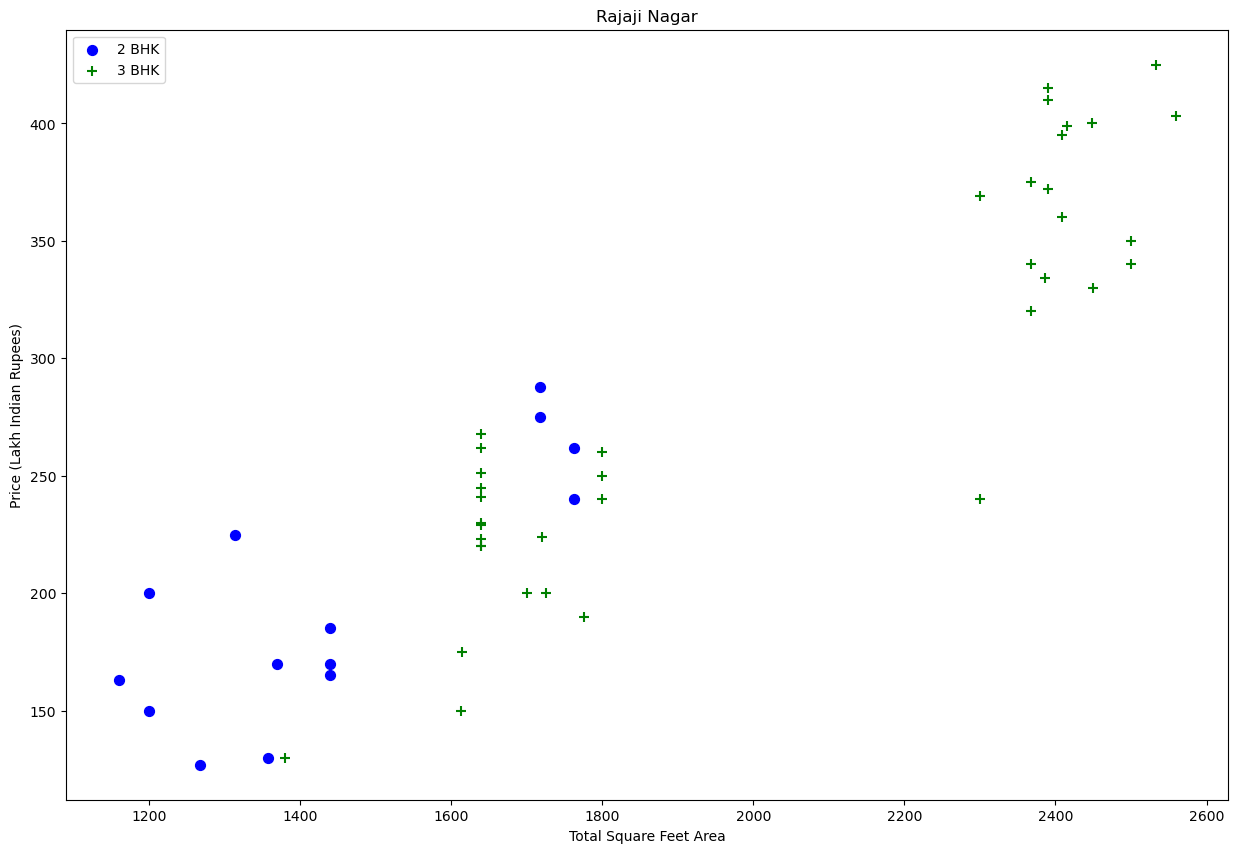

In [60]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.BHK==2)]
    bhk3 = df[(df.location==location) & (df.BHK==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df7,"Rajaji Nagar")

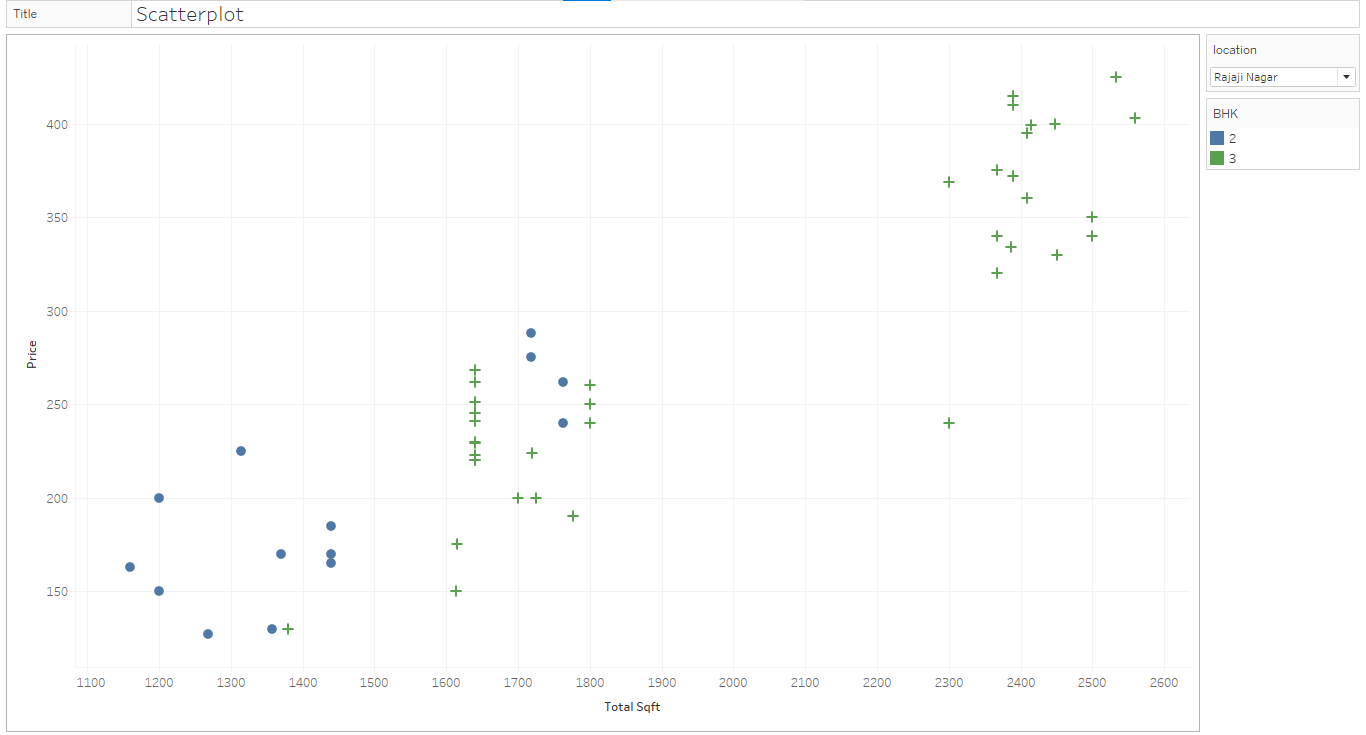

**Cross Checking the graph using Tableau Deasktop.**
It Seems accurate

**It seems some 2BHK cost more that 3BHK even though they have the same Total_sqft. we need to remove this kind of record**

In [61]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_ft),
                'std': np.std(bhk_df.price_per_ft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('BHK'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_ft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

In [62]:
df8 = remove_bhk_outliers(df7)
df8.shape

(7342, 6)

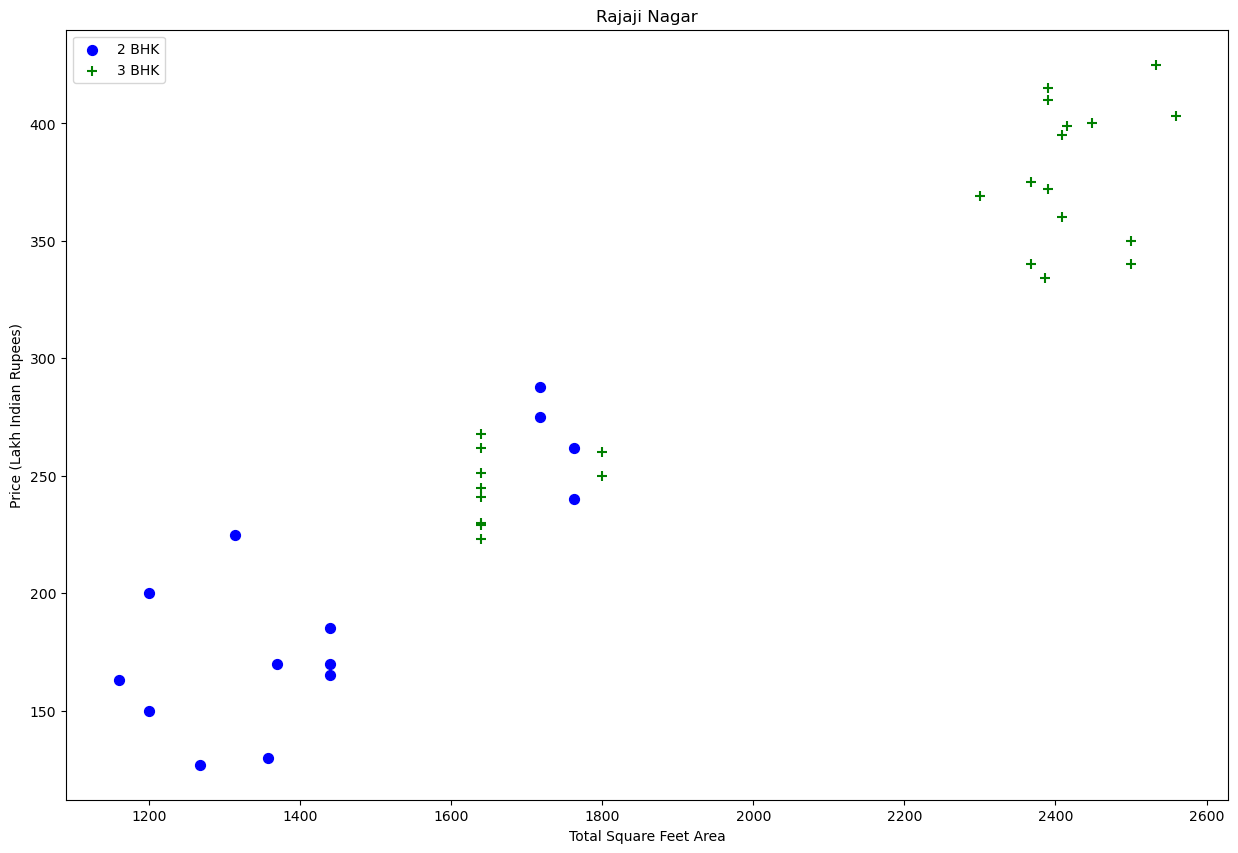

In [63]:
plot_scatter_chart(df8,"Rajaji Nagar")

Text(0, 0.5, 'Count')

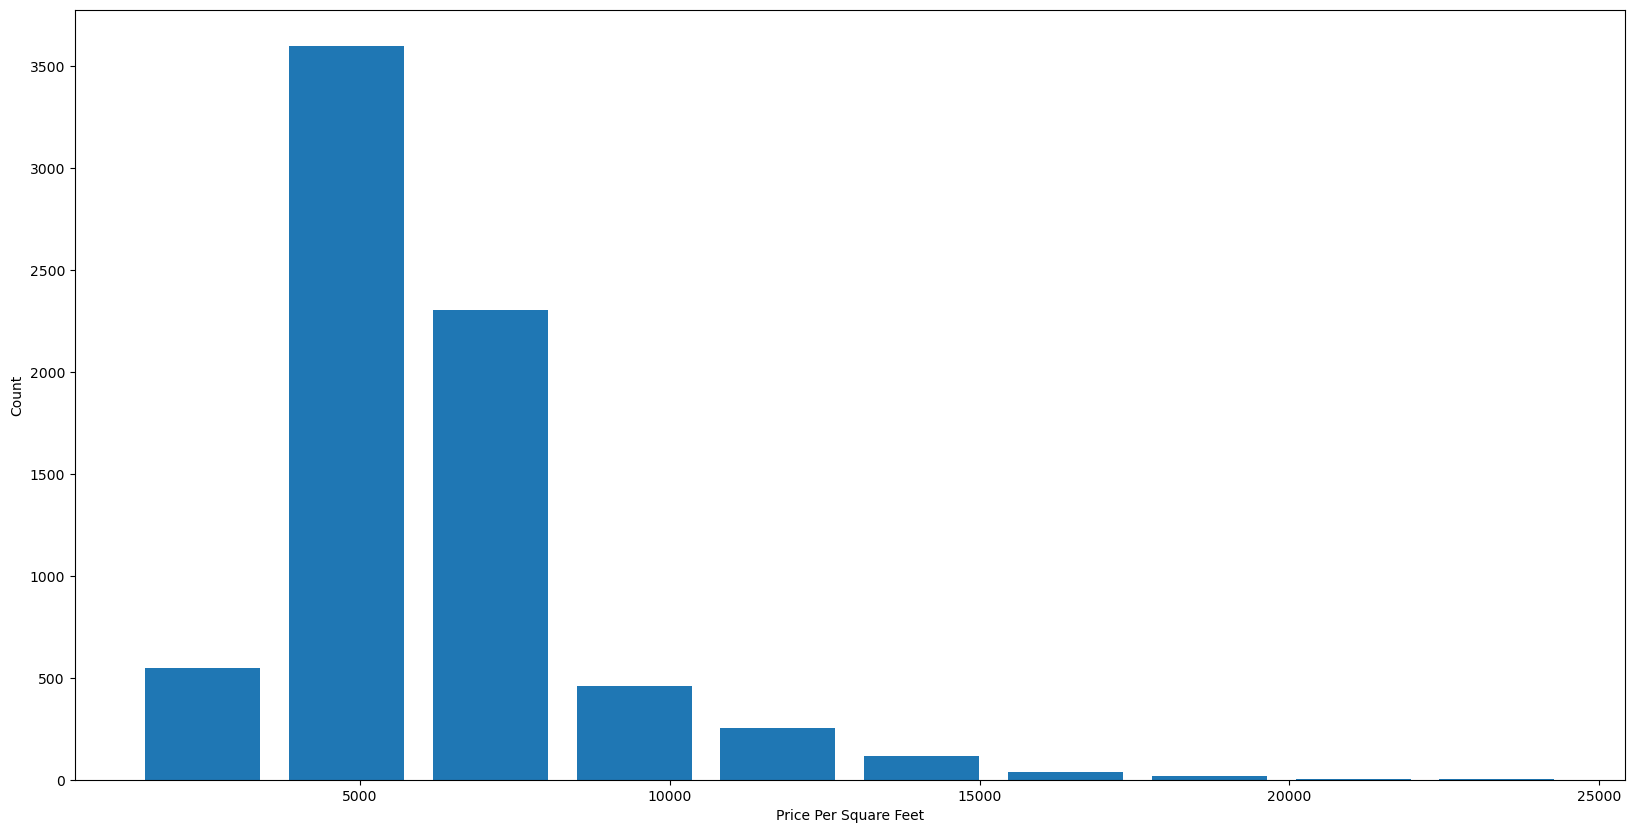

In [64]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8.price_per_ft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [68]:
df8.Bathroom.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [67]:
df8.columns

Index(['location', 'total_sqft', 'price', 'BHK', 'Bathroom', 'price_per_ft'], dtype='object')

Text(0, 0.5, 'Count')

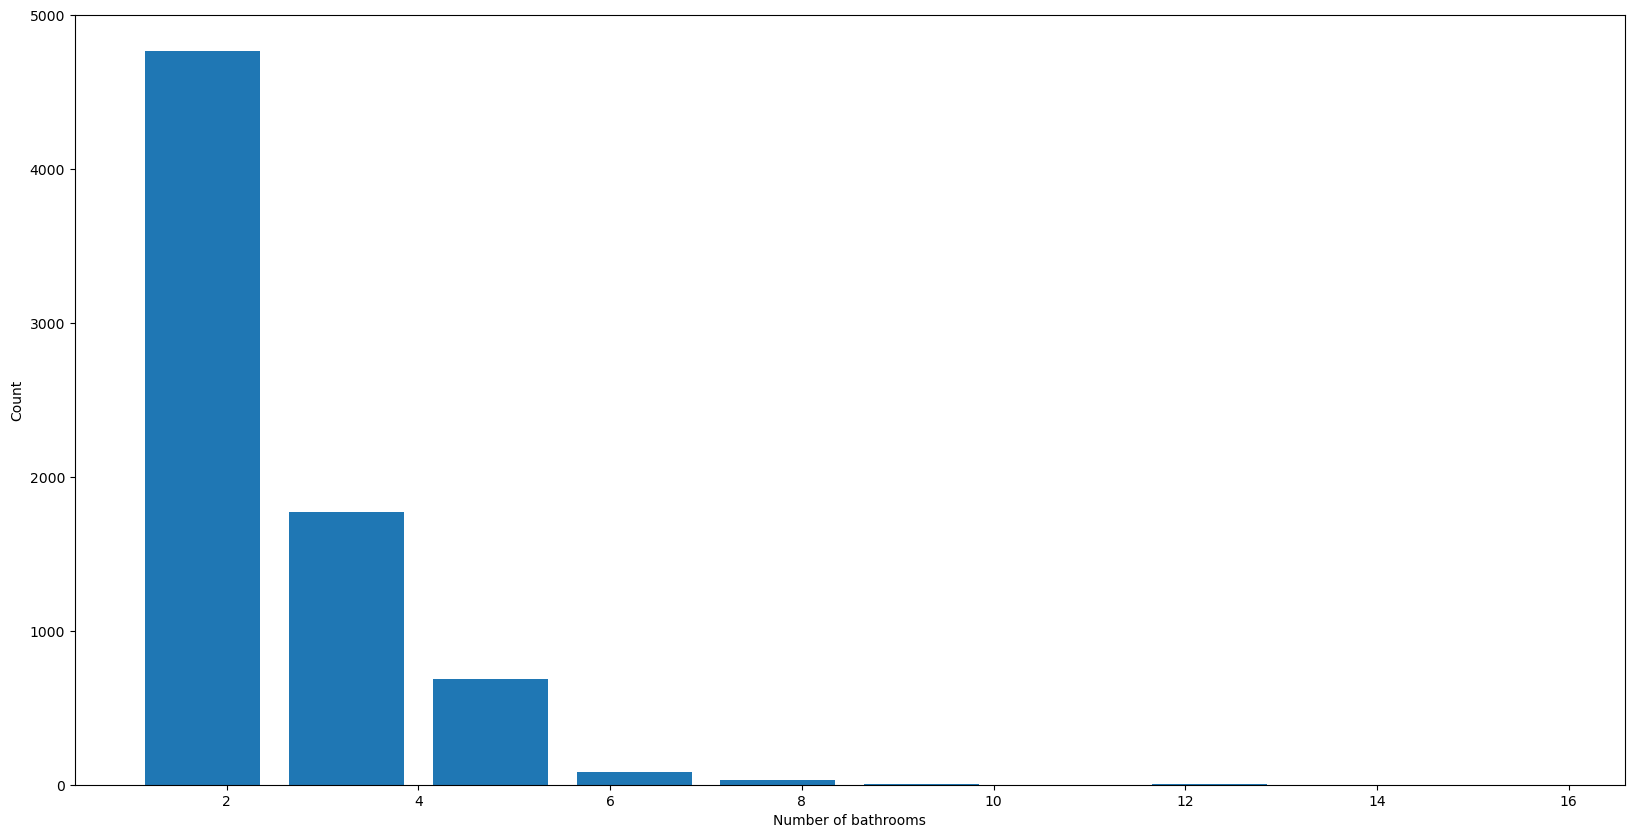

In [70]:
plt.hist(df8.Bathroom,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [71]:
df8[df8.Bathroom > 10]

,location,total_sqft,price,BHK,Bathroom,price_per_ft
5306,Neeladri Nagar,4000.0,160.0,10.0,12.0,4000.000000
5955,Other,12000.0,525.0,10.0,12.0,4375.000000
6044,Other,10000.0,550.0,16.0,16.0,5500.000000
6779,Other,6000.0,150.0,11.0,12.0,2500.000000
7110,Other,5425.0,275.0,13.0,13.0,5069.124424


In [72]:
df8[df8.Bathroom > df8.Bathroom+2]

,location,total_sqft,price,BHK,Bathroom,price_per_ft


**There is no flat that has more than the necessary bathroom**

In [73]:
df9 = df8.drop(['price_per_ft'], axis=1)
df9.shape

(7342, 5)

### One Hot Encoding

In [78]:
dummies = pd.get_dummies(df9['location']).astype(int)
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [91]:
df10 = pd.concat([df9,dummies.drop('Other', axis = 1)],axis = 'columns')
df10

,location,total_sqft,price,BHK,Bathroom,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,428.0,4.0,4.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,194.0,3.0,3.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,235.0,3.0,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,130.0,3.0,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,148.0,2.0,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10277,Yeshwanthpur,1195.0,100.0,2.0,2.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10278,Yeshwanthpur,1692.0,108.0,3.0,3.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10280,Yeshwanthpur,2500.0,185.0,6.0,5.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10285,Yeshwanthpur,1855.0,135.0,3.0,3.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [93]:
df11 = df10.drop('location',axis = 1)
df11

,total_sqft,price,BHK,Bathroom,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,428.0,4.0,4.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,194.0,3.0,3.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,235.0,3.0,2.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,130.0,3.0,2.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,148.0,2.0,2.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10277,1195.0,100.0,2.0,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10278,1692.0,108.0,3.0,3.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10280,2500.0,185.0,6.0,5.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10285,1855.0,135.0,3.0,3.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### Building Model

In [95]:
df11.shape

(7342, 244)

In [96]:
X = df11.drop('price',axis = 1)
X

,total_sqft,BHK,Bathroom,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,3.0,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,3.0,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10277,1195.0,2.0,2.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10278,1692.0,3.0,3.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10280,2500.0,6.0,5.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10285,1855.0,3.0,3.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [98]:
y = df11.price
len(y)

7342

In [100]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.8608750947912892

### Use different model to measure the accuracy

#### K-fold Model

In [104]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.87118936, 0.86031718, 0.85166951, 0.87304329, 0.88495684])

**As we can see, all the 5 iteration has an accuracy of more than 80%**

#### Best Model using GridSearchCV

In [118]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False],
                'copy_X': [True, False],
                'n_jobs': [None, 1, 2, 3, 4],
                'positive': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X, y)

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\tree\_classes.py", line 177, in fit
    self._validate_params()
  File "C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\base.py", 

,model,best_score,best_params
0,linear_regression,0.868410,"{'copy_X': True, 'fit_intercept': False, 'n_jo..."
1,lasso,0.732967,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.756072,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


### Model Testing 

In [119]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr.predict([x])[0]

In [120]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


84.56223639830209

In [121]:
predict_price('1st Phase JP Nagar',1000, 3, 3)

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


85.60175382838258

In [122]:
predict_price('Indira Nagar',1000, 3, 3)

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


173.99522779073362

In [123]:
predict_price('Indira Nagar',1000, 2, 2)

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


172.9557103606531